# Netflix Movies and TV shows analysis

I have made a project on netflix movies and tv shows to showcase the overall analysis of netflix. I have got this csv file from "Kaggles". We will analysis about netflix movies and Tv shows and see various kind of variation and explore various new things.We will compare between there ratings, how much movies and tv shows are there in netflix and many other things. We will use python's libraries:- "pandas dataframe", "matplotlib" , "seaborn"  and others to make this analysis. Well I have learned about pyhton and their libraries from [Data Analysis with Python: Zero to Pandas](zerotopandas.com). I have learned about many pyhton's libraries and many new functions.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

I have downloaded the file from kaggle.com which i got from python libraries in jovian.

In [25]:
!pip install jovian opendatasets --upgrade --quiet

In [26]:
import opendatasets as od

In [27]:
dataset_url="https://www.kaggle.com/shivamb/netflix-shows"

In [28]:
od.download("https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv")

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


In [29]:
import os

In [30]:
os.listdir("netflix-shows")

['netflix_titles.csv']

Let's begin by downloading the data, and listing the files within the dataset.

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [31]:
project_name = "zerotopandas-course-project-starter (Netflix analysis)" # change this (use lowercase letters and hyphens only)

In [32]:
!pip install jovian --upgrade -q

In [33]:
import jovian

In [34]:
jovian.commit(project=project_name,files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "priyanshdas51/zerotopandas-course-project-starter-netflix-analysis" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis


'https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis'

## Data Preparation and Cleaning

Now as we have the netflix csv file we can start cleaning the data and we can use it for further analysis. for cleaning we will use pandas and various other tool. We will remove the Null value. We will also choose 11 filtered columns among 12 and make the further analysis.



In [35]:
import pandas as pd

In [36]:
netflix_df=pd.read_csv("netflix_titles.csv")

In [37]:
netflix_df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [38]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [39]:
selected_cols=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in']

In [40]:
netflix_df=netflix_df[selected_cols].copy()

In [41]:
netflix_df.shape

(7787, 11)

In [42]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


In [43]:
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies"
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies"
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers"


In [44]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [45]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
dtype: bool


In [46]:
netflix_df.isnull().sum().sum()

3631

In [47]:
netflix_df.director.fillna("No Director", inplace=True)

In [48]:
netflix_df.director.isnull().sum()

0

As we can clearly see here that columns like director,cast,country,rating,data_added have null values in it. And total null values present in the data frame are 3631.

In [49]:
netflix_df.cast.fillna("No Cast", inplace=True)

In [50]:
netflix_df.country.fillna("Country Unavailable", inplace=True)

In [51]:
netflix_df.dropna(subset=["date_added"], inplace=True)

In [52]:
netflix_df.rating.fillna("No rating", inplace=True)

In [53]:
netflix_df.isnull().sum().sum()

0

After cleaning and removing the null values we can see that there is no null or inappropriate values present in any columns. For  this we have use two methods of pandas:-<br>
1.fillna.<br>
2.dropna.<br>

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "priyanshdas51/zerotopandas-course-project-starter-netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis


'https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis'

## Exploratory Analysis and Visualization

Lets analyse teh netflix briefly using various plots of matplotlib and seaborn.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [56]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [57]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


In [58]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

#### Lets compare how many TV shows and movies are there in netflix. And for this we will use Pie-chart.

In [59]:
netflix_df.type.value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

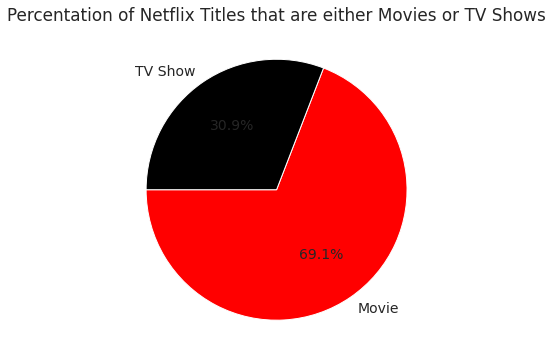

In [60]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
p=plt.pie(netflix_df.type.value_counts(), labels=netflix_df.type.value_counts().index, colors=["red","black"],autopct="%1.1f%%",startangle=180)
plt.show()

As we can clearly see the difference between the types of netflix whether it is movie or TV shows. We see that Movie is 69.1% and TV shows is 30.9%.

 #### Now lets analysis the rating of netflix movies or TV shows.

In [61]:
count_movies = netflix_df.groupby('rating')['title'].count().reset_index()

In [62]:
count_movies

,rating,title
0,G,39
1,NC-17,3
2,NR,83
3,No rating,7
4,PG,247
5,PG-13,386
6,R,665
7,TV-14,1928
8,TV-G,194
9,TV-MA,2861


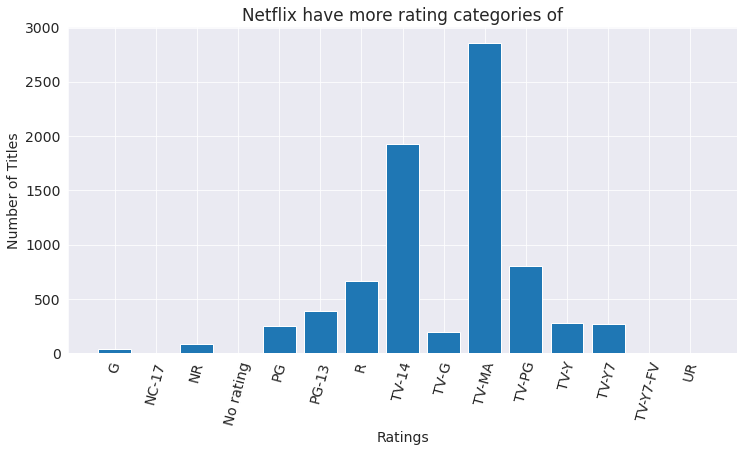

In [63]:
plt.figure(figsize=(12,6));
plt.bar(count_movies.rating,count_movies.title);
plt.xticks(rotation=75);
plt.xlabel("Ratings");
plt.ylabel("Number of Titles");
plt.title("Netflix have more rating categories of");

We can clearly see that the most rating categories of netflix is TV-Ma approx 2900 and then second categories is TV-14.

#### Top countries using Netflix.

In [64]:
netflix_df.country.value_counts()

United States                                                   2549
India                                                            923
Country Unavailable                                              506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

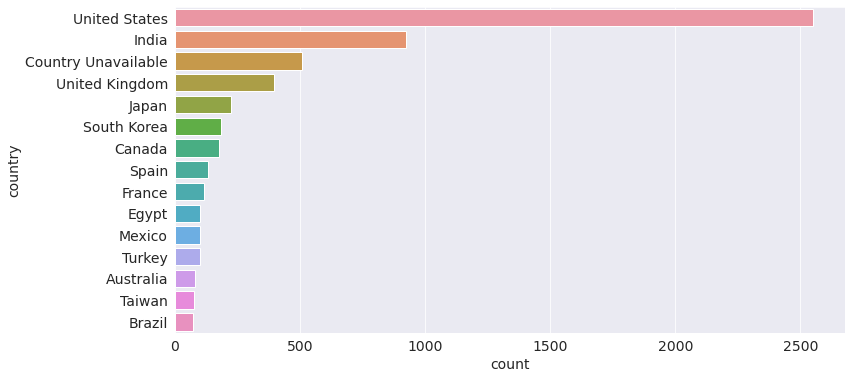

In [65]:
plt.figure(figsize=(12,6));
sns.countplot(y = netflix_df.country, order=netflix_df.country.value_counts().index[:15])
plt.show()


We can see that United States has the highest number of viewers of netflix. India is on the second position.

#### Top Genres on Netflix.

In [66]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


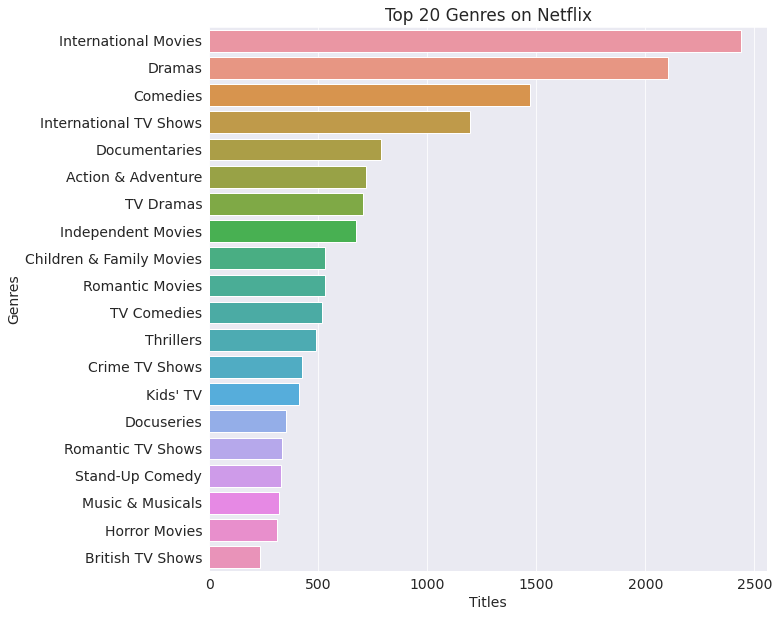

In [67]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [68]:
filtered_genres.value_counts().head(20)

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  518
Thrillers                    491
Crime TV Shows               426
Kids' TV                     412
Docuseries                   352
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             231
dtype: int64

We clearly see that international movies are on the tops with 2437. Second is dramas with 2106 and so on.

Let us save and upload our work to Jovian before continuing

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "priyanshdas51/zerotopandas-course-project-starter-netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis


'https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis'

## Asking and Answering Questions

Lets answer some of the following questions by doing analysis. We will deal with different question and try to analysis and give answer by using pandas, matplotlib, seaborn what we have learn from jovian course.



#### Q1. In 2015 how many movies were released?

In [195]:
netflix_movies_df=netflix_df[netflix_df.type=="Movie"]

In [196]:
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,No Director,Nasty C,Country Unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M..."


In [197]:
netflix_2015_df=netflix_movies_df[netflix_movies_df.release_year==2015]

In [194]:
netflix_2015_df.set_index("show_id")

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
s26,Movie,"Lyric R. Cabral, David Felix Sutcliffe",No Cast,United States,"June 30, 2016",2015,NR,84 min,Documentaries
s41,Movie,Muharrem Gülmez,"Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem G...",Turkey,"March 10, 2017",2015,TV-14,97 min,"Comedies, International Movies"
s63,Movie,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",2015,NR,90 min,"Horror Movies, Independent Movies, Thrillers"
s82,Movie,No Director,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,"April 28, 2017",2015,TV-PG,107 min,"International Movies, Music & Musicals"
s99,Movie,Gaby Dellal,"Elle Fanning, Naomi Watts, Susan Sarandon, Tat...",United States,"August 28, 2017",2015,PG-13,92 min,"Dramas, LGBTQ Movies"
...,...,...,...,...,...,...,...,...,...
s7717,Movie,No Director,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...","Russia, Spain","June 23, 2018",2015,TV-Y,78 min,Children & Family Movies
s7727,Movie,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies"
s7733,Movie,Antoinette Jadaone,"Toni Gonzaga, Coco Martin, Freddie Webb, JM de...",Philippines,"September 4, 2020",2015,TV-14,117 min,"Comedies, International Movies, Romantic Movies"


In [216]:
index=netflix_2015_df.index

In [220]:
Total_movies_in_2015=len(index)
Total_movies_in_2015

382

We see that 382 movies and Tv shows were released in 2015. And by just changing the year we can find how many movies and tv shows were released in that particular year.

#### Q2: Who is the top director in netflix ?

In [131]:
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [132]:
filtered_directors

title
7:19                                       Jorge Michel Grau
23:59                                           Gilbert Chan
9                                                Shane Acker
21                                            Robert Luketic
46                                               Serdar Akar
                                                 ...        
Zoo                                             Shlok Sharma
Zoom                                            Peter Hewitt
Zozo                                             Josef Fares
Zubaan                                           Mozez Singh
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Sam Dunn
Length: 6115, dtype: object

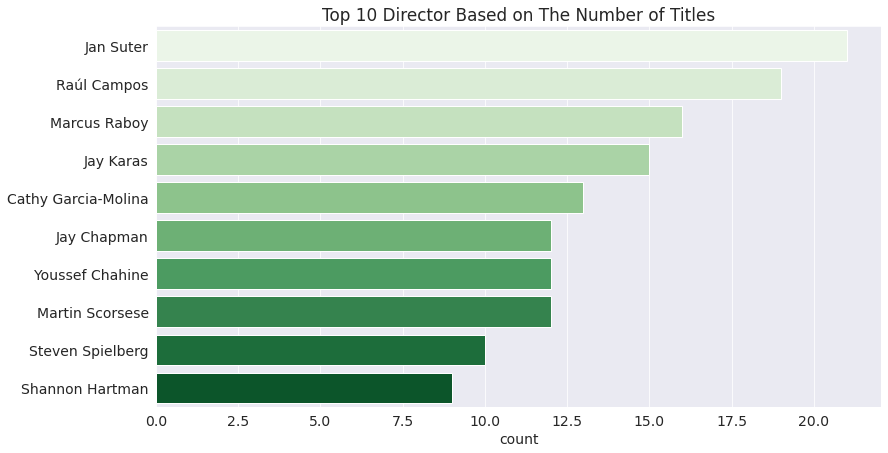

In [137]:
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Greens')
plt.show()

So we see the top director with the most numbers of movies or TV shows is Jan Suter followed by Raul Campos and so on.

#### Q3: Which actor in netflix  has the most number of movies?

In [148]:
netflix_movies_df=netflix_df[netflix_df.type=="Movie"]

In [149]:
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [150]:
filtered_cast_movie

title
7:19                         Demián Bichir
7:19                        Héctor Bonilla
7:19                         Oscar Serrano
7:19                          Azalia Ortiz
7:19                        Octavio Michel
                             ...          
Zubaan                        Meghna Malik
Zubaan                       Malkeet Rauni
Zubaan                      Anita Shabdish
Zubaan               Chittaranjan Tripathy
Zulu Man in Japan                  Nasty C
Length: 38312, dtype: object

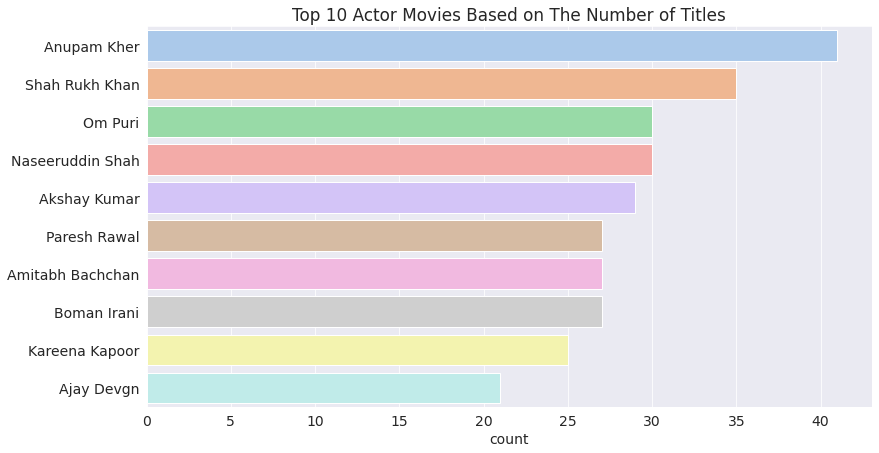

In [151]:
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

So, we see all the top actors of netflix are from bollywood and in the top is Anupam Kher with most number of movies followed by Shah Rukh Khan and so on.

#### Q4: Which actor in netflix has the most numbers of  TV shows?

In [153]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,No Director,Nasty C,Country Unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M..."
7785,s7786,TV Show,Zumbo's Just Desserts,No Director,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV"


In [155]:
netflix_show_df=netflix_df[netflix_df.type== "TV Show"]

In [158]:
filtered_cast_show = netflix_show_df[netflix_show_df.cast != "No Cast"].set_index("title").cast.str.split(",", expand=True).stack().reset_index(level=1, drop=True)

In [159]:
filtered_cast_show

title
3%                             João Miguel
3%                        Bianca Comparato
3%                            Michel Gomes
3%                         Rodolfo Valente
3%                         Vaneza Oliveira
                               ...        
Zona Rosa                   Ana Julia Yeyé
Zona Rosa                    Ray Contreras
Zona Rosa                      Pablo Morán
Zumbo's Just Desserts        Adriano Zumbo
Zumbo's Just Desserts          Rachel Khoo
Length: 17574, dtype: object

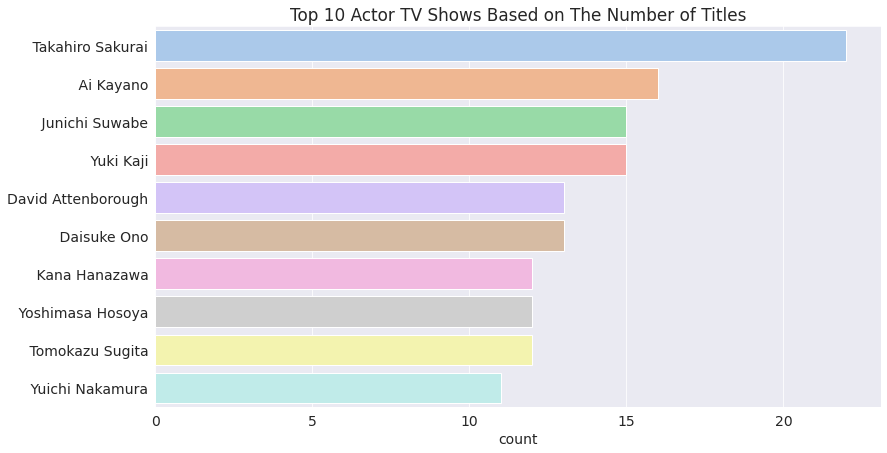

In [162]:
plt.figure(figsize=(13,7))
plt.title("Top 10 Actor TV Shows Based on The Number of Titles")
sns.countplot(y = filtered_cast_show, order=filtered_cast_show.value_counts().index[:10], palette="pastel")
plt.show()

So, we see that Takahiro Sakurai is the most worked actor in netflix tv shows followed by Ai Kayano and so on. There are also no actor from bollywood.

 #### Q5: In which year highest number of movies and TV shows were released ?

In [182]:
netflix_df.release_year.value_counts().head(10)

2018    1120
2017    1012
2019     996
2016     881
2020     868
2015     539
2014     334
2013     266
2012     218
2010     172
Name: release_year, dtype: int64

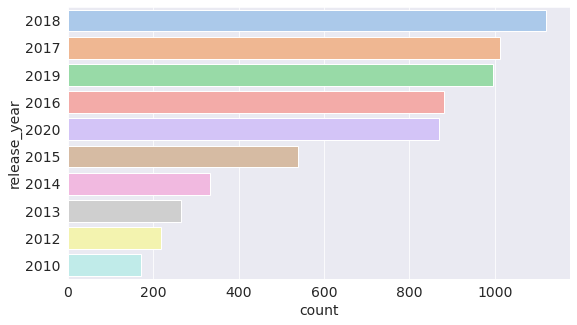

In [183]:
g=sns.countplot(y = netflix_df.release_year, order=netflix_df.release_year.value_counts().index[:10], palette="pastel")

In 2018 most of the movies and TV shows were released in netflix followed by 2017 and then 2019 and so on.

Let us save and upload our work to Jovian before continuing.

In [221]:
import jovian

In [222]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "priyanshdas51/zerotopandas-course-project-starter-netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis


'https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis'

## Inferences and Conclusion

#### So in this project we analysed various component of Netflix dataframe:-
1. How many Movies and Tv shows are respectively there in Netflix.<br>
2. The most rated categories in Netflix.<br>
3. Country which has highest subscription of Netflix.
4. Highest watched genres Netflix.
##### Then we dealed with few question:-
1. How many movies and Tv shows has been released in 2015 was 382.
2. Top Director of netflix is Jan Suter.
3. Top actor of netflix in movies is Anupam kher.
4. Top actor of netflix in  TV shows was Takahiro Sakurai
5. Year in which most movies and TV shows were released in Netflix is 2018.

In [223]:
import jovian

In [224]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "priyanshdas51/zerotopandas-course-project-starter-netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis


'https://jovian.ai/priyanshdas51/zerotopandas-course-project-starter-netflix-analysis'

## References and Future Work

 Well this was my first ever project on data science and i learned various new concept. Basically this is the analysis of Netflix and we analysed lot of things. Well I got the CSV file from Kaggle.com. I learned various concept of data analysis and graph from Jovian and I=it r

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()